Домашнє завдання Тема 11
# Використання генетичних алгоритмів для розв'язання задачі про рюкзак

Завдання (крок за кроком) - Будемо використовувати дані про 14 товарів з прикладу в конспекті.

1. Завантажити біблітеку PyGad

2. Визначити окремо в коді фітнес функцію.

3. Визначити початкову популяцію.

4. Задати параметри генетичного алгоритму: кількість популяцій, кількість батьківських хромосом, що приймають участь у кросовері, тип кросовера та мутації тощо.

5. Створити екземпляр генеричного алгоритму засобами PyGad.

6. Дослідити вплив різних кросоверів та мутацій на результат.

7. Зробити висновок про ефективність застосування генетичного алгоритму та оптимальний набір його параметрів.

In [386]:
class Product():
  """Represents any product by given name, space and price."""
  def __init__(self, name: str, space: float, price: float) -> None:
    self.name = name
    self.space = space
    self.price = price

# generate some list of products
products_list = []
products_list.append(Product('Refrigerator A', 0.751, 999.90))
products_list.append(Product('Cell phone', 0.00000899, 2199.12))
products_list.append(Product('TV 55', 0.400, 4346.99))
products_list.append(Product("TV 50' ", 0.290, 3999.90))
products_list.append(Product("TV 42' ", 0.200, 2999.00))
products_list.append(Product("Notebook A", 0.00350, 2499.90))
products_list.append(Product("Ventilator", 0.496, 199.90))
products_list.append(Product("Microwave A", 0.0424, 308.66))
products_list.append(Product("Microwave B", 0.0544, 429.90))
products_list.append(Product("Microwave C", 0.0319, 299.29))
products_list.append(Product("Refrigerator B", 0.635, 849.00))
products_list.append(Product("Refrigerator C", 0.870, 1199.89))
products_list.append(Product("Notebook B", 0.498, 1999.90))
products_list.append(Product("Notebook C", 0.527, 3999.00))

# for product in products_list:
#   print(f"Product name: {product.name}, space: {product.space}, price: {product.price}")
# len(products_list)

In [387]:
# 1. Завантажити біблітеку PyGad
%pip install pygad

import pygad
import numpy as np

In [388]:
def fitness_func(ga_instance, solution, solution_idx):
    global count, total_prices, total_spaces
    count += 1

    # Перетворення значень на 0 або 1 (для перетворення рандомних мутацій)
    for i in range(len(solution)):
        if solution[i] < 0.5:
            solution[i] = 0
        else:
            solution[i] = 1

    total_space = np.sum(solution * spaces)
    total_price = np.sum(solution * prices)

    # print('--', count, 'solution:', solution, 'total_space:', total_space, 'total_price', total_price)
    total_prices.append(total_price)
    total_spaces.append(total_space)

    if total_space > capacity:
        return 0  # Penalty if the total space exceeds the knapsack capacity

    return total_price

In [389]:
# Genetic Algorithm Parameters
num_generations = 50
num_parents_mating = 5
sol_per_pop = 10
num_genes = len(products_list)

# Create the initial population
initial_population = np.random.randint(2, size=(sol_per_pop, num_genes))

In [390]:
ga_instance = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_func,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    initial_population=initial_population,
    crossover_type="single_point",   # single_point , two_points , uniform , scattered.
    mutation_type="random",  # random, swap, inversion, scramble, -adaptive
    mutation_percent_genes=(10)
)

/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning:

The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.



In [391]:
capacity = 3.0

# Extract spaces and prices from the products list
spaces = np.array([product.space for product in products_list])
prices = np.array([product.price for product in products_list])
names = np.array([product.name for product in products_list])

count = 0
total_prices = []
total_spaces = []
# Fitness function

ga_instance.run()
solution, solution_fitness, _ = ga_instance.best_solution()
print("Best Solution:", solution)
print("Загальна ціна товарів:", solution_fitness)
print("Загальний об'єм товарів:", np.sum(solution * spaces))

Best Solution: [1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0.]
Загальна ціна товарів: 20931.560000000005
Загальний об'єм товарів: 2.9062089899999997


In [392]:
import plotly.express as px
figure = px.line(x=range(len(total_prices)), y=total_prices, title = 'Зміна загальної ціни товарів у вантажівці за популяціями')
figure.show()

In [393]:
import plotly.express as px
figure = px.line(x=range(len(total_spaces)), y=total_spaces, title = "Зміна загальної об'єму товарів у вантажівці за популяціями")
figure.show()

## Опис результатів

* random, single_point - Best Solution: [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.]
Загальна ціна товарів: 22481.55
Загальний об'єм товарів: 2.91520899
Як видно з графіку зміни загальної ціни товарів, алгоритм знаходить максимальний рівень на 120-ому солюшені і продовжує пацювати до 450

* random, two_points -Best Solution: [0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.]
Загальна ціна товарів: 24281.55
Загальний об'єм товарів: 2.91720899
Ціна знаходить максимальний рівень на 40-овому солюшені і працює до 450

* random, uniform - Best Solution: [0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.]
Загальна ціна товарів: 24281.55
Загальний об'єм товарів: 2.91720899
Ціна знаходить максимальний рівень на 100-ому солюшені


* swap, uniform - Best Solution: [0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1.]
Загальна ціна товарів: 18823.0
Загальний об'єм товарів: 2.43780899
29/82

* swap, scattered - Best Solution: [0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1.]
Загальна ціна товарів: 23972.89
Загальний об'єм товарів: 2.87480899
Максимальний рівень ціни на 60-ому солюшені, а зупиняється на 180

і т.д.
Результати виведені в таблицю

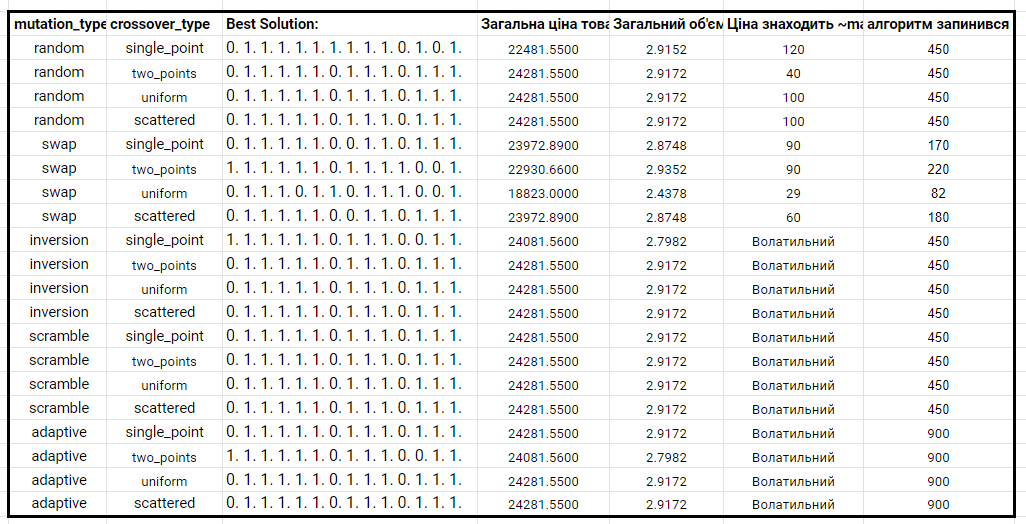

# Висновки про ефективність застосування генетичного алгоритму та оптимальний набір його параметрів

1. Найкращі результати за ціною:
Найвища загальна ціна товарів у вантажівці була досягнута з мутацією типу random, inversion, scramble, та adaptive при використанні кросоверів two_points, uniform, і scattered. Вона склала 24281.55 з об'ємом 2.9172.

2. Хоча тип мутації swap працює швидше в порівнянні з іншими типами мутацій, результати виявилися найгіршими серед усіх тестованих параметрів.

3. Стабільність результатів:
Параметри з random та кросоверами two_points, uniform, і scattered показали стабільні результати протягом усіх 450 поколінь. Інші параметри, такі як swap, мали нижчі результати і часто показували зупинку до досягнення максимального числа поколінь, що свідчить про можливе застрявання в локальних мінімумах.

4. Волатильність:
Для типів мутацій inversion, scramble, і adaptive спостерігалася висока волатильність у результатах, що вказує на нерівномірність процесу пошуку оптимального рішення та можливі труднощі з стабільною еволюцією. Ці типи мутацій, попри їх потенціал досягнення високих результатів, можуть потребувати додаткових налаштувань або вдосконалень.

5. Ефективність типів кросоверів:
Кросовери two_points, uniform, і scattered показали найвищу ефективність при різних типах мутацій. Кросовер single_point дав трохи нижчі результати, але все ще залишався конкурентоспроможним.

6. Кращий набір параметрів:
Оптимальним набором параметрів для даної задачі можна вважати використання мутації random та кросоверів two_points, uniform, або scattered. Ця комбінація забезпечувала найвищу ціну товарів у вантажівці і стабільно досягала результатів.


### Рекомендації щодо параметрів:
* Тип мутації: Вибирайте random для стабільних і високих результатів.
* Тип кросовера: Використовуйте two_points, uniform, або scattered для забезпечення стабільної еволюції та високих результатів.

* Зупинка алгоритму: Для більшої стабільності можливо варто додати додаткові критерії зупинки або адаптивні механізми, що змінюють параметри в процесі виконання.

Таким чином, для задачі про рюкзак оптимальним виявився набір з random мутацією та кросовером two_points, uniform або scattered. Це дозволяє забезпечити найкращі результати як за ціною товарів, так і за стабільністю алгоритму.